In [1]:
from sqlite3 import connect
import os
import shutil

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure

# cd .\Desktop\python\jupiter_projects\moniki\
# Для одной большой пдф
# jupyter nbconvert --to webpdf --no-input popul_gp1.ipynb

# Для сохранения как html, но потом можно в pdf и уже странично.
# jupyter nbconvert --to html --no-input dynamic_moniki.ipynb

In [2]:
conn = connect(r'selen_4.0.2\poliklinika\moniki\database\data_analisys.db')
data = pd.read_sql_query(
    'SELECT * FROM moniki_data',
    conn
)

free_cell = pd.read_sql_query(
    'SELECT * FROM moniki_specialties',
    conn
)

need_record = pd.read_sql_query(
    'SELECT * FROM moniki_records',
    conn
)

data['date_adding'] = pd.to_datetime(data['date_adding'], format='%Y-%m-%d %H:%M:%S')
data['count_talons'] = data['count_talons'] * -1
#data.info()

# Анализ открытия ячеек расписания для МОНИКИ по конкретной специальности.

Обратите внимание, при указании в таблицах, например часа "8", учитывается время <font color="red">с "8:00" по "8:59"</font>.
    
Информация актуальна за период в 30 дней до текущего дня и носит **ознакомительный характер**.

### Дата и количество добавлений ячеек расписания.

In [3]:
need_spec = 'Аллергология и иммунология'
add_spec_in_datetime = data[data['name'] == need_spec]
add_spec_in_datetime.columns = ['Дата и время добавления', 'Специальность', 'Количество талонов']
add_spec_in_datetime

,Дата и время добавления,Специальность,Количество талонов
28,2024-01-23 10:12:06.208080,Аллергология и иммунология,19
52,2024-01-24 00:19:11.654129,Аллергология и иммунология,10
88,2024-01-25 00:24:40.197718,Аллергология и иммунология,19
113,2024-01-25 10:08:14.661431,Аллергология и иммунология,2
147,2024-01-26 00:46:12.215415,Аллергология и иммунология,29
212,2024-01-30 00:22:10.316675,Аллергология и иммунология,19
252,2024-01-31 00:33:11.892871,Аллергология и иммунология,10
298,2024-02-01 00:21:52.813195,Аллергология и иммунология,19
342,2024-02-01 13:29:53.102473,Аллергология и иммунология,3
354,2024-02-02 00:35:18.253061,Аллергология и иммунология,10


### Количество открытий расписания по часам.

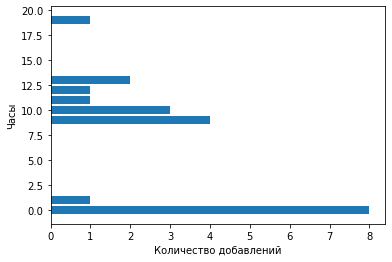

In [4]:
add_hour = data[data['name'] == need_spec]['date_adding'].dt.hour.value_counts()
add_hour = add_hour.reset_index()
add_hour.columns = ['Час добавления', 'Количество добавлений']
#display(add_hour.style.hide_index())

plt.barh(y=add_hour['Час добавления'], width=add_hour['Количество добавлений'])
plt.ylabel('Часы')
plt.xlabel('Количество добавлений')
plt.show()

### Вероятность открытия ячеек в конкретный час.

In [5]:
prsnt = data[data['name'] == need_spec]['date_adding'].dt.hour.value_counts()
prsnt_hours = round((prsnt / prsnt.values.sum()) *100, 1)
prsnt_hours = prsnt_hours.reset_index()
prsnt_hours.columns = ['Час добавления', 'Вероятность отк.расп. в этот час, %']
prsnt_hours.style.hide_index()

Час добавления,"Вероятность отк.расп. в этот час, %"
0,38.100000
9,19.000000
10,14.300000
13,9.500000
1,4.800000
11,4.800000
12,4.800000
19,4.800000


### Вероятность открытия ячеек по дням недели.

In [6]:
week_day = data[data['name'] == need_spec]['date_adding'].dt.day_name().value_counts()
rus_weekday = {
    'Monday': 'Понедельник',
    'Tuesday': 'Вторник',
    'Wednesday': 'Среда',
    'Thursday': 'Четверг',
    'Friday': 'Пятница',
    'Saturday': 'Суббота',
    'Sunday': 'Воскресенье'
}
lst_days = []
for day in week_day.index:
    lst_days.append(rus_weekday[day])
week_day.index = lst_days
prsn_week_day = (week_day/ week_day.values.sum()) *100
prsn_week_day = prsn_week_day.reset_index()
prsn_week_day.columns = ['День недели', 'Вероятность открытия расп., %']
prsn_week_day.style.hide_index()

День недели,"Вероятность открытия расп., %"
Четверг,33.333333
Вторник,23.809524
Пятница,23.809524
Среда,14.285714
Воскресенье,4.761905
